In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## TODO: Replace with the path to your dataset
PATH_TO_DATASET = '/Users/justina-irene/Desktop/nlp_project/complaints.csv' 
############################################################

df = pd.read_csv(PATH_TO_DATASET)
df.head()

/Users/justina-irene/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-02-02,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,12919,NaN,Consent not provided,Web,2022-02-02,Closed with non-monetary relief,Yes,NaN,5177559
1,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",WA,98056,NaN,NaN,Web,2022-03-14,Closed with explanation,Yes,NaN,5321616
2,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",GA,31909,NaN,NaN,Web,2022-03-14,Closed with explanation,Yes,NaN,5319887
3,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",OH,44133,NaN,Other,Web,2022-03-14,Closed with explanation,Yes,NaN,5320509
4,2022-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",ME,04342,NaN,NaN,Web,2022-04-01,In progress,Yes,NaN,5394173


<AxesSubplot:>

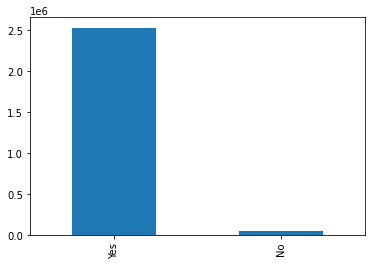

In [2]:
df['Timely response?'].value_counts().plot(kind='bar')

<AxesSubplot:>

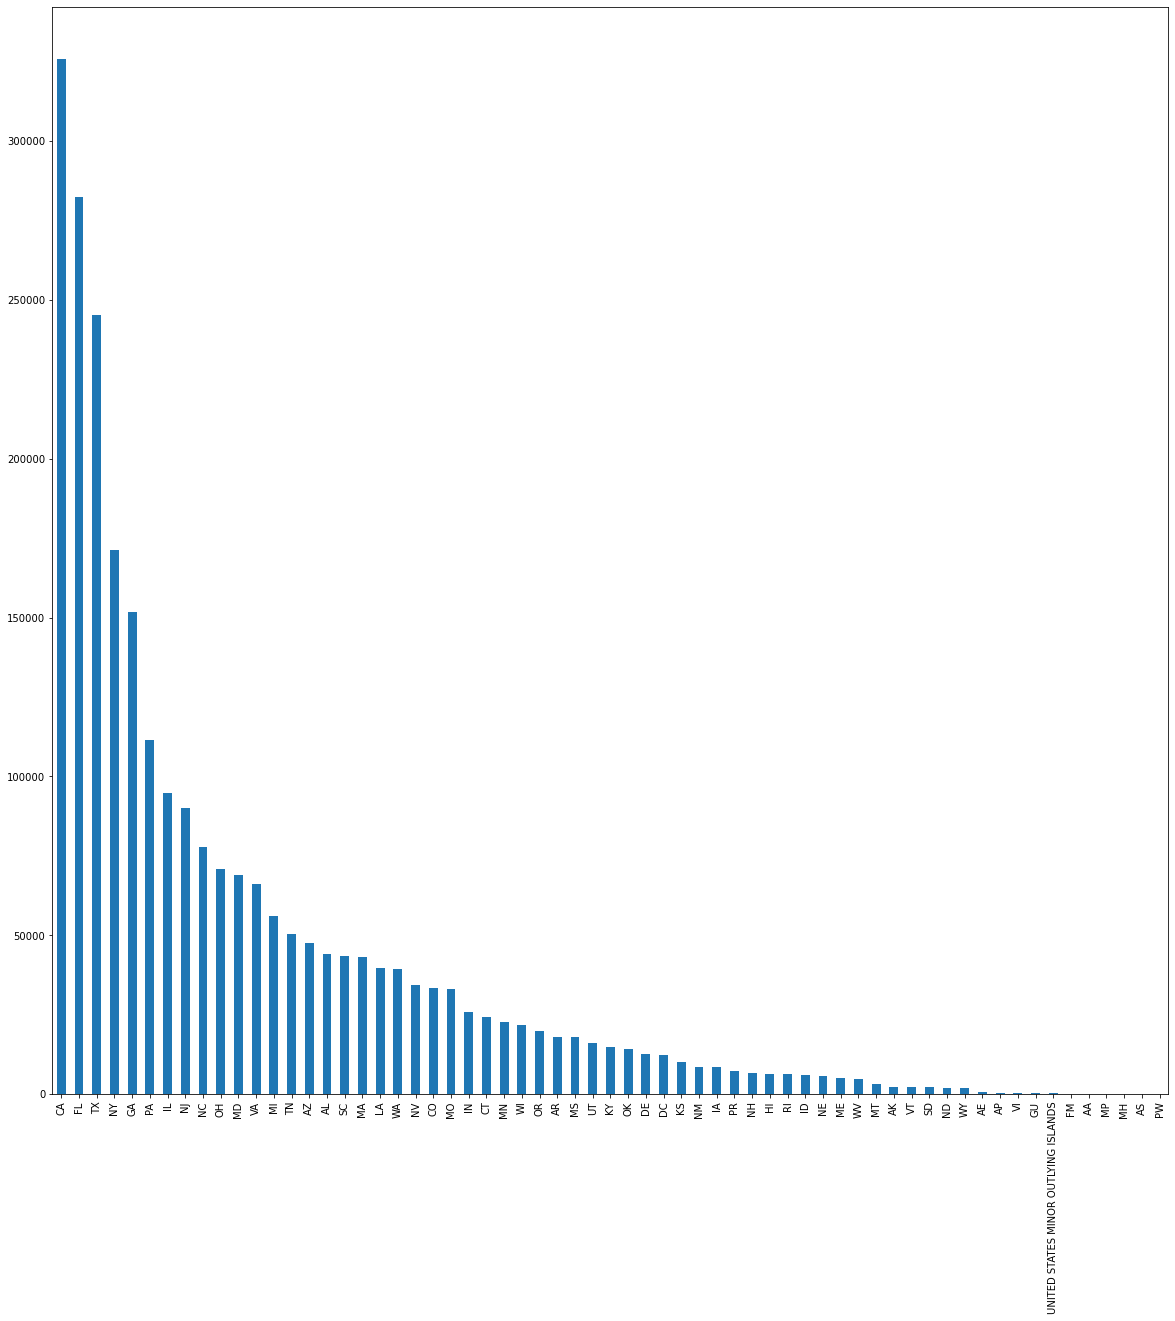

In [3]:
plt.figure(figsize=(20, 20))
df['State'].value_counts().plot(kind='bar')

TOP 20 issues

<AxesSubplot:>

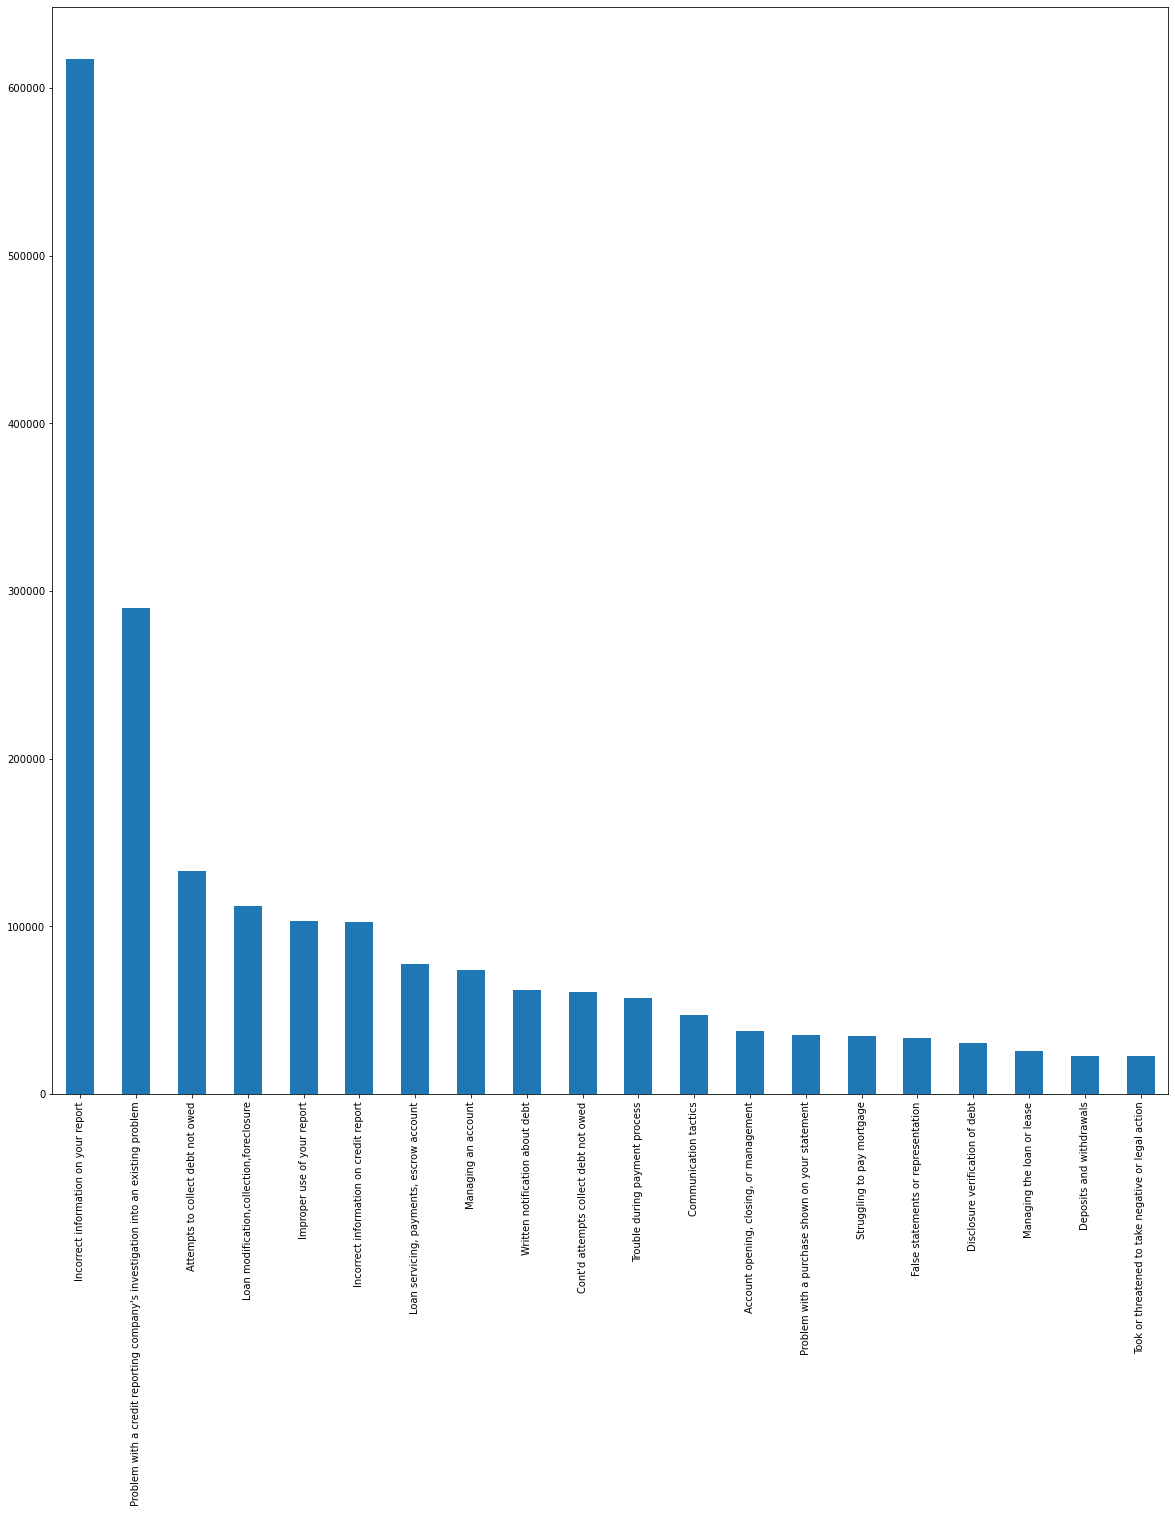

In [4]:
plt.figure(figsize=(20, 20))
df['Issue'].value_counts()[:20].plot(kind='bar')

Top 20 the company name for number of complaints

<AxesSubplot:>

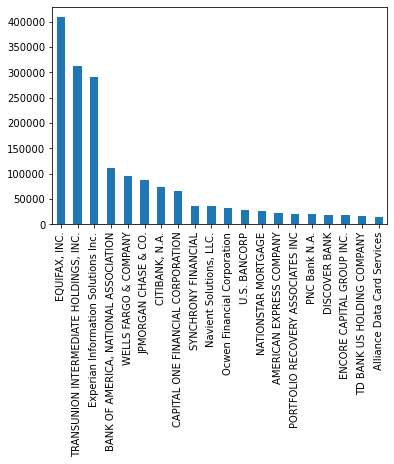

In [5]:
df['Company'].value_counts()[:20].plot(kind='bar')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573063 entries, 0 to 2573062
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 353.

In [9]:
print(df.isnull().sum())

Date received                         0
Product                               0
Sub-product                      235163
Issue                                 0
Sub-issue                        653711
Consumer complaint narrative    1671477
Company public response         1506530
Company                               0
State                             39264
ZIP code                          39509
Tags                            2268781
Consumer consent provided?       758078
Submitted via                         0
Date sent to company                  0
Company response to consumer          3
Timely response?                      0
Consumer disputed?              1804605
Complaint ID                          0
dtype: int64


235163/2573063 = 9.1%
653711/2573063 =25%
Consumer complaint narrative，Company public response, Tags, Consumer disputed? need to drop
Sub-product，Sub-issue，State，ZIP code，Consumer consent provided? missing value can be replaced by mode

In [10]:
df = df.drop(['Consumer complaint narrative','Company public response','Tags','Consumer disputed?'], axis=1)



In [11]:
counts = df['Consumer consent provided?'].value_counts().to_dict()
print(counts)

{'Consent provided': 901993, 'Consent not provided': 840142, 'Other': 68897, 'Consent withdrawn': 3953}


In [12]:
df['Consumer consent provided?']= df['Consumer consent provided?'].fillna('Consent provided')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573063 entries, 0 to 2573062
Data columns (total 14 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Company                       object
 6   State                         object
 7   ZIP code                      object
 8   Consumer consent provided?    object
 9   Submitted via                 object
 10  Date sent to company          object
 11  Company response to consumer  object
 12  Timely response?              object
 13  Complaint ID                  int64 
dtypes: int64(1), object(13)
memory usage: 274.8+ MB


In [14]:
df['Sub-product'].fillna(df['Sub-product'].mode()[0])
df['Sub-issue'].fillna(df['Sub-issue'].mode()[0])
df['State'].fillna(df['State'].mode()[0])
df['ZIP code'].fillna(df['ZIP code'].mode()[0])

0            12919
1            98056
2            31909
3            44133
4            04342
            ...   
2573058    84054.0
2573059    74066.0
2573060    55379.0
2573061    30215.0
2573062    91304.0
Name: ZIP code, Length: 2573063, dtype: object

In [15]:
counts2 = df['Sub-product'].value_counts().to_dict()
print(counts2)


{'Credit reporting': 1016295, 'Checking account': 151463, 'General-purpose credit card or charge card': 105055, 'I do not know': 90382, 'Other mortgage': 86635, 'Conventional home mortgage': 75508, 'Other debt': 73822, 'Conventional fixed mortgage': 70613, 'Credit card debt': 63772, 'Other (i.e. phone, health club, etc.)': 44542, 'FHA mortgage': 42534, 'Medical debt': 41814, 'Federal student loan servicing': 31954, 'Credit card': 28697, 'Loan': 26476, 'Conventional adjustable mortgage (ARM)': 25380, 'Non-federal student loan': 25163, 'Medical': 21186, 'Store credit card': 20323, 'Installment loan': 17834, 'Other bank product/service': 17825, 'Vehicle loan': 17780, 'Other banking product or service': 14392, 'Mobile or digital wallet': 13858, 'Other type of mortgage': 13807, 'Savings account': 13298, 'Payday loan': 13007, 'Domestic (US) money transfer': 12836, 'VA mortgage': 12699, 'Private student loan': 11749, 'Home equity loan or line of credit': 11624, 'Other personal consumer report

In [16]:
df['Sub-product']= df['Sub-product'].fillna('Credit reporting')

In [17]:
counts3 = df['Sub-issue'].value_counts().to_dict()
print(counts3)

{'Information belongs to someone else': 393919, 'Their investigation did not fix an error on your report': 147882, 'Account status incorrect': 74790, 'Account information incorrect': 71039, 'Debt is not yours': 67062, 'Investigation took more than 30 days': 63285, "Credit inquiries on your report that you don't recognize": 62199, 'Was not notified of investigation status or results': 57889, "Didn't receive enough information to verify debt": 44820, 'Debt was paid': 40322, 'Reporting company used your report improperly': 39535, 'Debt was result of identity theft': 37897, 'Account status': 37057, 'Debt is not mine': 36724, 'Personal information incorrect': 33236, 'Information is not mine': 32383, 'Frequent or repeated calls': 27044, 'Attempted to collect wrong amount': 26719, 'Deposits and withdrawals': 26225, "Credit card company isn't resolving a dispute about a purchase on your statement": 24210, 'Not given enough info to verify debt': 21809, "Didn't receive notice of right to dispute

In [18]:
df['Sub-issue']= df['Sub-issue'].fillna('Information belongs to someone else')

In [19]:
counts4 = df['State'].value_counts().to_dict()
print(counts4)

{'CA': 325866, 'FL': 282250, 'TX': 245293, 'NY': 171253, 'GA': 151641, 'PA': 111514, 'IL': 94909, 'NJ': 90111, 'NC': 77747, 'OH': 70794, 'MD': 68856, 'VA': 66203, 'MI': 56000, 'TN': 50431, 'AZ': 47581, 'AL': 44162, 'SC': 43541, 'MA': 43306, 'LA': 39636, 'WA': 39269, 'NV': 34225, 'CO': 33491, 'MO': 33021, 'IN': 25730, 'CT': 24362, 'MN': 22789, 'WI': 21920, 'OR': 19741, 'AR': 17997, 'MS': 17953, 'UT': 16017, 'KY': 14994, 'OK': 14214, 'DE': 12509, 'DC': 12227, 'KS': 10200, 'NM': 8706, 'IA': 8506, 'PR': 7168, 'NH': 6751, 'HI': 6347, 'RI': 6305, 'ID': 6015, 'NE': 5623, 'ME': 5113, 'WV': 4902, 'MT': 3151, 'AK': 2409, 'VT': 2403, 'SD': 2302, 'ND': 1947, 'WY': 1886, 'AE': 758, 'AP': 515, 'VI': 493, 'GU': 240, 'UNITED STATES MINOR OUTLYING ISLANDS': 226, 'FM': 115, 'AA': 48, 'MP': 39, 'MH': 33, 'AS': 32, 'PW': 13}


In [20]:
df['State']= df['State'].fillna('CA')

In [21]:
counts5 = df['ZIP code'].value_counts().to_dict()
print(counts5)

{35405.0: 2152, 30349.0: 2106, 33025.0: 1864, 2301.0: 1848, '30349': 1710, 19143.0: 1705, 77449.0: 1648, 33311.0: 1502, '33025': 1465, 19120.0: 1433, 28269.0: 1422, '35405': 1353, 33169.0: 1318, 33023.0: 1296, 30331.0: 1281, '02301': 1242, '30331': 1202, '33311': 1199, 19144.0: 1182, 77084.0: 1181, '77449': 1170, 30281.0: 1149, 19124.0: 1124, 33068.0: 1092, '28269': 1089, 33313.0: 1079, 30058.0: 1078, '33023': 1076, 30253.0: 1067, 19138.0: 1059, 11434.0: 1036, '33169': 1034, '19143': 1033, '30058': 1033, 60620.0: 1020, 35401.0: 1017, 77407.0: 1016, 77494.0: 1010, 33024.0: 1008, 33027.0: 1003, 30318.0: 1000, 30016.0: 1000, 19139.0: 993, '77084': 985, '30281': 984, 19140.0: 979, 30038.0: 971, 77433.0: 967, 33161.0: 957, 33179.0: 950, 11236.0: 946, '19120': 940, 19111.0: 934, 30135.0: 922, 33056.0: 919, 29229.0: 916, 33063.0: 903, 38125.0: 901, 38016.0: 897, 28216.0: 893, '33027': 891, 19131.0: 888, 38128.0: 887, '11434': 885, 90046.0: 885, 77584.0: 882, 30213.0: 876, '30038': 867, 75115.

In [22]:
df['ZIP code']= df['ZIP code'].fillna('35405.0')

In [23]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2022-02-02,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,12919,Consent not provided,Web,2022-02-02,Closed with non-monetary relief,Yes,5177559
1,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"EQUIFAX, INC.",WA,98056,Consent provided,Web,2022-03-14,Closed with explanation,Yes,5321616
2,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,"EQUIFAX, INC.",GA,31909,Consent provided,Web,2022-03-14,Closed with explanation,Yes,5319887
3,2022-03-14,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,"EQUIFAX, INC.",OH,44133,Other,Web,2022-03-14,Closed with explanation,Yes,5320509
4,2022-04-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"EQUIFAX, INC.",ME,04342,Consent provided,Web,2022-04-01,In progress,Yes,5394173


In [24]:
df.tail()

,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
2573058,2017-02-09,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt resulted from identity theft,Bonneville Billing and Collections,UT,84054.0,Consent provided,Web,2017-02-09,Closed with explanation,Yes,2334969
2573059,2015-04-29,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",Information belongs to someone else,"CITIBANK, N.A.",OK,74066.0,Consent provided,Web,2015-04-29,Closed with explanation,Yes,1352738
2573060,2017-03-31,Credit reporting,Credit reporting,Credit reporting company's investigation,No notice of investigation status/result,Experian Information Solutions Inc.,MN,55379.0,Consent provided,Web,2017-03-31,Closed with non-monetary relief,Yes,2412926
2573061,2017-01-16,Credit reporting,Credit reporting,Incorrect information on credit report,Account status,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30215.0,Consent provided,Web,2017-01-16,Closed with explanation,Yes,2292586
2573062,2018-03-07,Mortgage,Other type of mortgage,Trouble during payment process,Information belongs to someone else,WELLS FARGO & COMPANY,CA,91304.0,Consent provided,Referral,2018-03-08,Closed with explanation,Yes,2837068
